In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from os import path
import time
import datetime as dt

In [2]:
!pip install xlrd

In [3]:
os.chdir('C:\\Users\\ysingh\\Desktop\\')

In [4]:
# Reading the csv file from the Desktop
#df = pd.read_csv('../Desktop/ALAC Energy Data/ALAC_Annual_Load_Data.csv')
#,errors = 'coerce', dtype={'Energy Consumption (kWh)':float, 'Load Consumption (kW)':float})
#df.head()
df =pd.read_excel('../Desktop/ALAC Energy Data/ALAC_Annual_Load_Data.xlsx')
df.dtypes

Date_and_Time                    datetime64[ns]
Energy Consumption (kWh)                 object
Load Consumption (kW)                    object
Solar Power Output 500 (kW)             float64
Solar Power Output 500 (kWh)            float64
Solar Power Output 600 (kW)             float64
Solar Power Output 600 (kWh)            float64
Battery Discharge Power (kW)            float64
Battery Discharge Power (kWh)           float64
dtype: object

In [5]:
df['Date_and_Time'] = pd.to_datetime(df['Date_and_Time'])
df.set_index('Date_and_Time', inplace=True)

In [6]:
df['Energy Consumption (kWh)'] = pd.to_numeric(df['Energy Consumption (kWh)'], errors = 'coerce')
df['Load Consumption (kW)']= pd.to_numeric(df['Load Consumption (kW)'], errors = 'coerce')

In [7]:
# dtypes tells the type of coulmn data, It is important to convert object type data to float type.
df.dtypes

Energy Consumption (kWh)         float64
Load Consumption (kW)            float64
Solar Power Output 500 (kW)      float64
Solar Power Output 500 (kWh)     float64
Solar Power Output 600 (kW)      float64
Solar Power Output 600 (kWh)     float64
Battery Discharge Power (kW)     float64
Battery Discharge Power (kWh)    float64
dtype: object

In [8]:
df['Energy Consumption (kWh)'].sum()

1723834.05

In [9]:
# Index of the dataframe
#df.index

In [10]:
df.describe()

,Energy Consumption (kWh),Load Consumption (kW),Solar Power Output 500 (kW),Solar Power Output 500 (kWh),Solar Power Output 600 (kW),Solar Power Output 600 (kWh),Battery Discharge Power (kW),Battery Discharge Power (kWh)
count,17481.000000,17481.000000,17519.000000,17519.000000,17519.000000,17519.000000,1.751900e+04,1.752000e+04
mean,98.611867,197.223715,85.882261,42.941130,103.058713,51.529357,1.637001e+01,8.194520e+00
std,23.969046,47.938092,124.303929,62.151964,149.164715,74.582357,4.981303e+01,2.493765e+01
min,4.990000,9.980000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,82.500000,164.990000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,97.090000,194.180000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,117.820000,235.650000,149.975450,74.987725,179.970600,89.985300,2.619345e-14,1.309673e-14
max,171.620000,343.230000,471.090400,235.545200,565.308500,282.654250,3.498645e+02,1.749323e+02


In [11]:
#df.iloc[:14592].dtypes

In [12]:
#df.set_index('Date_and_Time', inplace=True)

In [13]:
# Yearly Energy Consumption (MWh)
df['Energy_Consumption (MWh)']= df['Energy Consumption (kWh)']/1000
df['Energy_Consumption (MWh)'].mean()
#df['Energy_Consumption (MWh)'].max()

0.09861186717007035

143.65283750000003

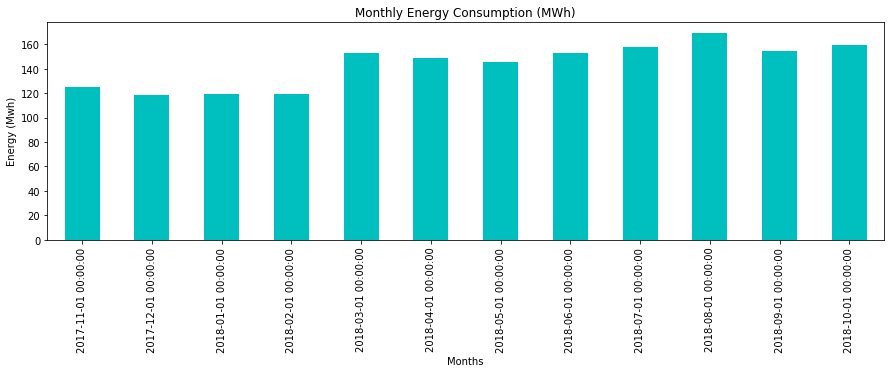

In [14]:
# Monhtly Energy Consumption (MWh)

Monthly_Energy_Consumption = df['Energy_Consumption (MWh)'].resample('MS').sum()

Monthly_Energy_Consumption.plot(color='C',title='Monthly Energy Consumption (MWh)',figsize=(15,4),kind='bar')

plt.xlabel('Months')
plt.ylabel('Energy (Mwh)')
#print ('Monthly_Energy_Consumption')

Monthly_Energy_Consumption.mean()

In [15]:
#df.pivot_table(df,index='Date_and_Time', aggfunc='sum')
#df['Energy Consumption (kWh)']

4.72283301369863

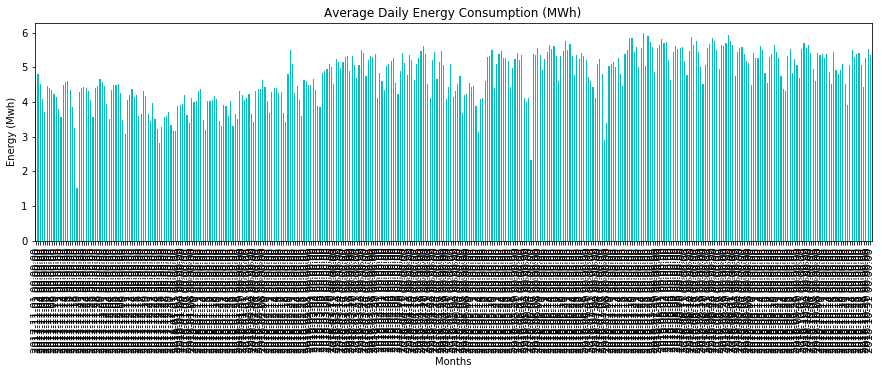

In [16]:
# Average Daily Energy Consumption (MWh)

Daily_Energy_Consumption =df['Energy_Consumption (MWh)'].resample('D').sum()
Daily_Energy_Consumption.plot(color = 'C', title='Average Daily Energy Consumption (MWh)',figsize=(15,4),kind='bar')

plt.xlabel('Months')
plt.ylabel('Energy (Mwh)')


#Average daily energy consumption(MWh) 
Daily_Energy_Consumption.mean()
#Daily_Energy_Consumption

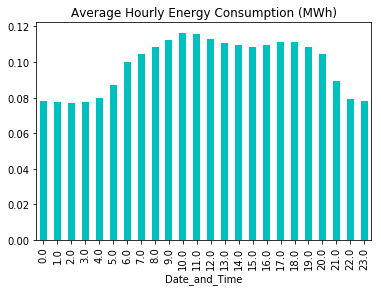

In [17]:
# Average Hourly energy consumption of the year - Energy usage trend of the day
df['Energy_Consumption (MWh)'].groupby(df['Energy_Consumption (MWh)'].index.hour).mean().plot(kind ='bar',
                                                                                             color = 'C', title='Average Hourly Energy Consumption (MWh)')

#x.plot(kind ='bar',title= 'Energy(MWh)')

2.1092547671232875

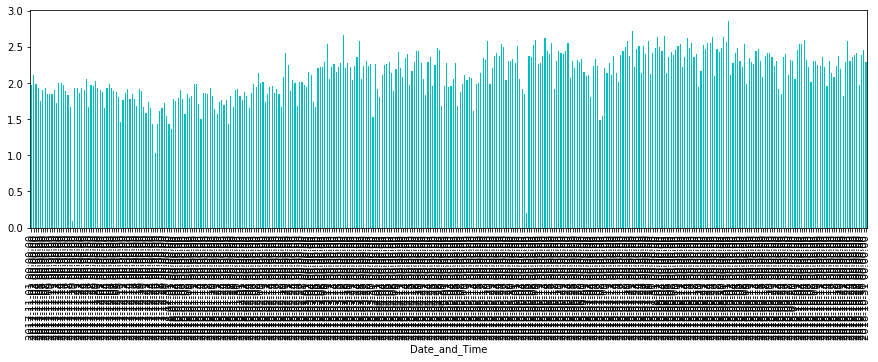

In [33]:
# daytime energy consumption - Total daily energy consumption of the day between 8am and 5pm

df['Daytime_Energy_Consumption'] = df['Energy_Consumption (MWh)'].between_time('08:00','17:00')

df['Daytime_Energy_Consumption'].resample('D').sum().plot(color = 'C',figsize=(15,4),kind='bar')

# Average daytime energy consumption between 8am to 5pm
df['Daytime_Energy_Consumption'].resample('D').sum().mean()

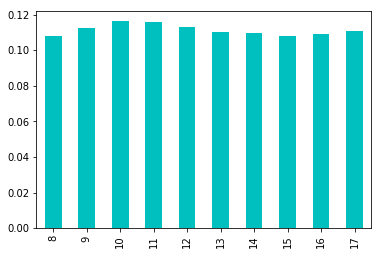

In [19]:
# average hourly day time energy consumption between 08:00 and 17:00 for the whole year.
df['Energy_Consumption (MWh)'].between_time('08:00','17:00').groupby(lambda x: x.hour).mean().plot(kind ='bar',
                                                                                                  color='C')

2.6135782465753423

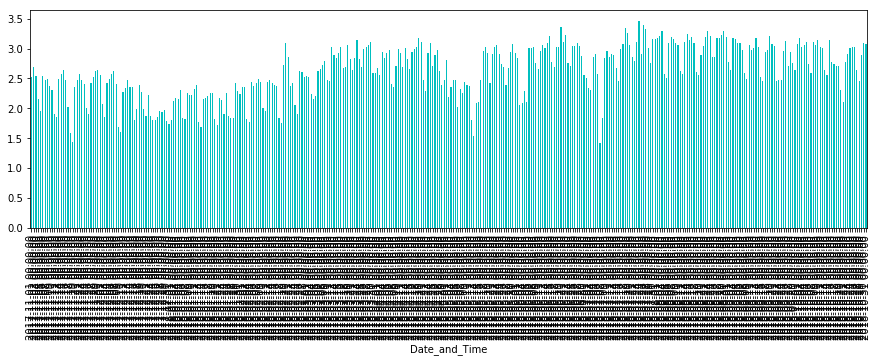

In [34]:
#Nightime daily energy consumption - daily night-time energy consumption between 5:30pm to 5:30am

df['Nightime_Energy_Consumption'] = df['Energy_Consumption (MWh)'].between_time('17:30','07:30')
df['Nightime_Energy_Consumption'].resample('D').sum().plot(color ='C',figsize=(15,4),kind='bar')

# Average night-time energy consumption between 5:30pm to 5:30am
df['Nightime_Energy_Consumption'].resample('D').sum().mean()


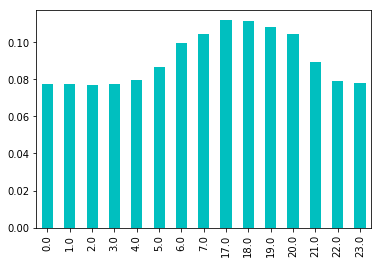

In [36]:
# average hourly night time energy consumption between 17:30 and 07:30 for the whole year.
df['Energy_Consumption (MWh)'].between_time('17:30','07:30').groupby(lambda x: x.hour).mean().plot(kind = 'bar',
                                                                                                  color="C")

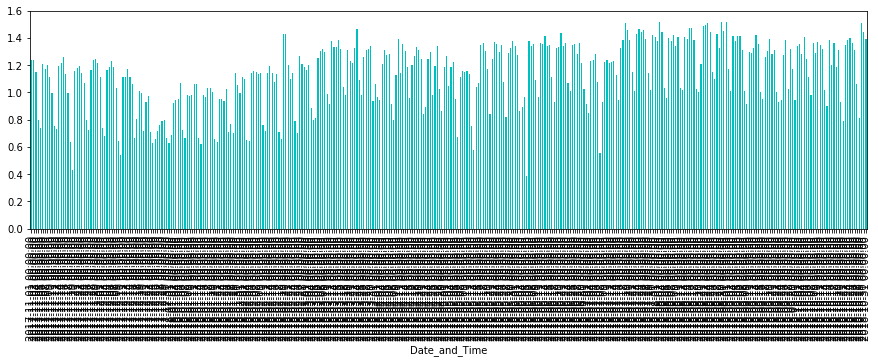

In [40]:
#Energy Consumption between 5pm and 10pm per day

df['Nightime_Energy_Consumption'] = df['Energy_Consumption (MWh)'].between_time('17:00','22:00')
df['Nightime_Energy_Consumption'].resample('D').sum().plot(color ='C',figsize=(15,4),kind='bar')
#df['Nightime_Energy_Consumption'].resample('D').sum().mean()

In [23]:
#Average hourly nighttime energy consumption
#df['Nightime_Energy_Consumption'] = df['Energy_Consumption (MWh)'].between_time('17:00','22:00')
#df['Nightime_Energy_Consumption'].groupby(lambda x: x.hour).mean().plot(kind ='bar',color='c')

# Monthly Load Consumption

In [24]:
# Daily Total Energy Consumption for the month of November
#df['Energy Consumption (kWh)'].loc['2017-11'].groupby(lambda x: x.hour).mean().plot(kind='bar',color='C')
#df['x'].between_time('17:00','08:00').mean()


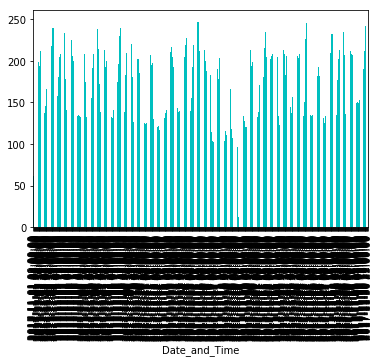

In [39]:
# sum of daily energy consumption for November

#nov =df['Energy Consumption (kWh)'].loc['2017-11-01 08H': '2017-11-30 17H'].resample('D').sum()
nov = df['Energy Consumption (kWh)'].loc['2017-11'].resample('H').sum()
nov.plot(kind='bar',color='c')

In [26]:
#Monthly load Consumption (kW)
df['Load Consumption (kW)'].describe()



count    17481.000000
mean       197.223715
std         47.938092
min          9.980000
25%        164.990000
50%        194.180000
75%        235.650000
max        343.230000
Name: Load Consumption (kW), dtype: float64

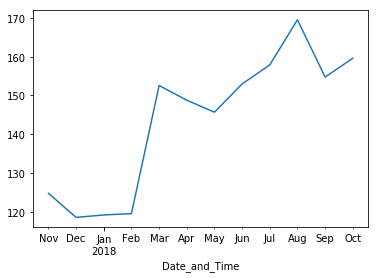

In [27]:
Monthly_Load_Consumption = df['Load Consumption (kW)'].resample('MS').mean()
Monthly_Energy_Consumption.plot()


In [28]:
#pd.DatetimeIndex.indexer_between_time('2018/01/01','2018/31/01', include_start=True, include_end=True )

In [29]:
# to fill the empty cells with NAN and then filling them with Zeros(0) 
df.fillna(method='ffill')
df.fillna(0).dtypes

Energy Consumption (kWh)         float64
Load Consumption (kW)            float64
Solar Power Output 500 (kW)      float64
Solar Power Output 500 (kWh)     float64
Solar Power Output 600 (kW)      float64
Solar Power Output 600 (kWh)     float64
Battery Discharge Power (kW)     float64
Battery Discharge Power (kWh)    float64
Energy_Consumption (MWh)         float64
Daytime_Energy_Consumption       float64
Nightime_Energy_Consumption      float64
dtype: object

In [30]:
# Change the dtype of the dataframe
# df.convert_objects(convert_dates = 'coerce', convert_numeric = True).dtypes

In [31]:
# another way of converting dtypes (Object to Float)
#df['Energy Consumption (kWh)'] = pd.to_numeric(df['Energy Consumption (kWh)'], errors='coerce')
#df['Energy Consumption (kWh)'].dtypes

In [32]:
# To fill the nan value with Zero
#values= {'Energy Consumption (kWh)':0}
#df['Energy Consumption (kWh)'].fillna(value=values).dtypes